In [1]:
# 必要なモジュールのインポート
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import ShuffleSplit
from sklearn import linear_model

In [2]:
data = load_iris()
X = data.data
y = data.target

In [4]:
ss = ShuffleSplit(n_splits=1,
                 train_size=0.5,
                 test_size = 0.5,
                 random_state=0)

In [5]:
clf = linear_model.LogisticRegression()

In [6]:
train_index, test_index = next(ss.split(X))

X_train, X_test = X[train_index], X[test_index]
y_train, y_test = y[train_index], y[test_index]

In [7]:
clf.fit(X_train,y_train);

C:\Users\h-suzuki\AppData\Local\Continuum\anaconda3\envs\sklearn\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\h-suzuki\AppData\Local\Continuum\anaconda3\envs\sklearn\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [8]:
print(clf.score(X_train, y_train))

0.92


In [9]:
print(clf.score(X_test, y_test)) # テストデータの精度

0.84


In [10]:
ss = ShuffleSplit(n_splits=10,     # 分割を10個生成
                  train_size=0.5,  # 学習は半分
                  test_size =0.5,  # テストも半分
                  random_state=0)  # 乱数種（再現用）

scores = []
for train_index, test_index in ss.split(X): # 学習データとテストデータのインデックスを作成
    
    X_train, X_test = X[train_index], X[test_index] # 学習データ，テストデータ
    y_train, y_test = y[train_index], y[test_index] # 学習データのラベル，テストデータのラベル

    clf.fit(X_train, y_train)         # 識別器の学習
    score = clf.score(X_test, y_test) # テストデータの精度
    scores.append(score)

scores = np.array(scores)
print(scores)

[0.84       0.93333333 0.90666667 1.         0.90666667 0.93333333
 0.94666667 1.         0.90666667 0.88      ]


C:\Users\h-suzuki\AppData\Local\Continuum\anaconda3\envs\sklearn\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\h-suzuki\AppData\Local\Continuum\anaconda3\envs\sklearn\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\h-suzuki\AppData\Local\Continuum\anaconda3\envs\sklearn\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\h-suzuki\AppData\Local\Continuum\anaconda3\envs\sklearn\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to si

In [11]:
scores.mean()

0.9253333333333333

In [12]:
scores.std()

0.04702717890279574

In [13]:
print("{0} +/- {1}".format(scores.mean(), scores.std()))

0.9253333333333333 +/- 0.04702717890279574


In [14]:
print("{0:4.2f} +/- {1:4.2f} %".format(scores.mean() * 100, scores.std() * 100))

92.53 +/- 4.70 %


In [15]:
# matplotlibの準備
import matplotlib.pyplot as plt
%matplotlib inline

In [19]:
train_sizes = np.arange(0.1, 1.0, 0.1)

In [20]:
all_mean = []
all_std  = []

for train_size in train_sizes:

    ss = ShuffleSplit(n_splits=100,
                      train_size=train_size,
                      test_size=1-train_size)

    scores = []
    for train_index, test_index in ss.split(X):

        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]

        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)
        scores.append(score)

    scores = np.array(scores)
    print("train_size {0:.0f}%: {1:4.2f} +/- {2:4.2f} %".format(train_size    * 100, 
                                                                scores.mean() * 100, 
                                                                scores.std()  * 100))
    all_mean.append(scores.mean() * 100)
    all_std.append(scores.std() * 100)

C:\Users\h-suzuki\AppData\Local\Continuum\anaconda3\envs\sklearn\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\h-suzuki\AppData\Local\Continuum\anaconda3\envs\sklearn\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\h-suzuki\AppData\Local\Continuum\anaconda3\envs\sklearn\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\h-suzuki\AppData\Local\Continuum\anaconda3\envs\sklearn\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to si

train_size 10%: 73.95 +/- 10.70 %
train_size 20%: 82.49 +/- 10.60 %


C:\Users\h-suzuki\AppData\Local\Continuum\anaconda3\envs\sklearn\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\h-suzuki\AppData\Local\Continuum\anaconda3\envs\sklearn\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\h-suzuki\AppData\Local\Continuum\anaconda3\envs\sklearn\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\h-suzuki\AppData\Local\Continuum\anaconda3\envs\sklearn\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Speci

train_size 30%: 87.85 +/- 8.20 %
train_size 40%: 91.13 +/- 5.70 %


C:\Users\h-suzuki\AppData\Local\Continuum\anaconda3\envs\sklearn\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\h-suzuki\AppData\Local\Continuum\anaconda3\envs\sklearn\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\h-suzuki\AppData\Local\Continuum\anaconda3\envs\sklearn\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\h-suzuki\AppData\Local\Continuum\anaconda3\envs\sklearn\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Speci

C:\Users\h-suzuki\AppData\Local\Continuum\anaconda3\envs\sklearn\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\h-suzuki\AppData\Local\Continuum\anaconda3\envs\sklearn\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\h-suzuki\AppData\Local\Continuum\anaconda3\envs\sklearn\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\h-suzuki\AppData\Local\Continuum\anaconda3\envs\sklearn\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to si

train_size 50%: 92.99 +/- 4.88 %
train_size 60%: 94.32 +/- 3.46 %


C:\Users\h-suzuki\AppData\Local\Continuum\anaconda3\envs\sklearn\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\h-suzuki\AppData\Local\Continuum\anaconda3\envs\sklearn\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\h-suzuki\AppData\Local\Continuum\anaconda3\envs\sklearn\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\h-suzuki\AppData\Local\Continuum\anaconda3\envs\sklearn\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Speci

train_size 70%: 94.98 +/- 3.28 %
train_size 80%: 94.93 +/- 4.07 %


C:\Users\h-suzuki\AppData\Local\Continuum\anaconda3\envs\sklearn\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\h-suzuki\AppData\Local\Continuum\anaconda3\envs\sklearn\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\h-suzuki\AppData\Local\Continuum\anaconda3\envs\sklearn\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\h-suzuki\AppData\Local\Continuum\anaconda3\envs\sklearn\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Speci

train_size 90%: 96.13 +/- 4.92 %


C:\Users\h-suzuki\AppData\Local\Continuum\anaconda3\envs\sklearn\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\h-suzuki\AppData\Local\Continuum\anaconda3\envs\sklearn\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\h-suzuki\AppData\Local\Continuum\anaconda3\envs\sklearn\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\h-suzuki\AppData\Local\Continuum\anaconda3\envs\sklearn\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Speci

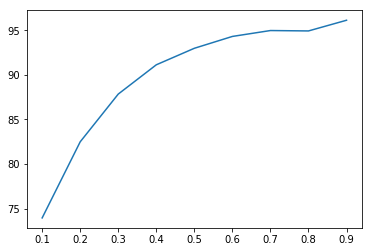

In [21]:
plt.plot(train_sizes, all_mean)

(0, 1)

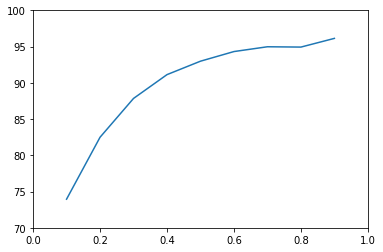

In [24]:
plt.plot(train_sizes, all_mean)
plt.ylim(70,100)
plt.xlim(0,1)

Text(0.5, 1.0, 'Average of 10 hold-out tests for different training size')

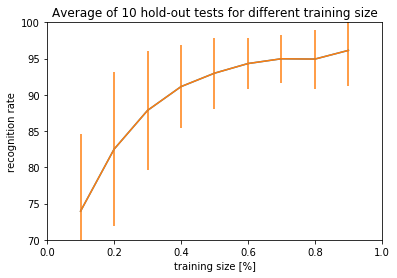

In [26]:
plt.plot(train_sizes, all_mean)
plt.ylim(70,100)
plt.xlim(0,1)
plt.errorbar(train_sizes, all_mean, yerr=all_std)
plt.xlabel("training size [%]")
plt.ylabel("recognition rate")
plt.title("Average of 10 hold-out tests for different training size")